# Part 1 - Install the required packages



In [1]:
!pip install autoviz -q

     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 132 kB 9.8 MB/s 
     |████████████████████████████████| 3.1 MB 45.1 MB/s 


In [2]:
!pip install pandas_profiling==2.9.0 -U -q

     |████████████████████████████████| 258 kB 5.2 MB/s 
     |████████████████████████████████| 4.7 MB 43.2 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 675 kB 51.7 MB/s 
     |████████████████████████████████| 812 kB 40.8 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install shap -q 

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [4]:
!pip install openml

     |████████████████████████████████| 119 kB 5.1 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137327 sha256=e0c32431fee8e38fe7f9d558ea921d210891ede58b46d64902077c9524532e2c
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/cf4ac86aa18e2cd647ed16ebe274a5dacee9d0075fa02af250
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=68faec949acad1c1e0aa4ca617e2ad1636698d3577e49bfee54e5fb3d5e45331
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


# Part 2 - Import packages

In [5]:
import openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


# Part 3 - Get the OpenML dataset

This method imports the employee_salaries from an existing task in OpenML

In [6]:
task = openml.tasks.get_task(295794)
data = openml.datasets.get_dataset(task.dataset_id)

In [7]:
X, y, categorical_indicator, attribute_names = data.get_data(
    dataset_format="dataframe", target=data.default_target_attribute)
es = pd.DataFrame(X, columns=attribute_names)
es["salary"] = y
es.head()

,full_name,gender,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,salary
0,"Aarhus, Pam J.",F,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,09/22/1986,1986,69222.18
1,"Aaron, David J.",M,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,09/12/1988,1988,97392.47
2,"Aaron, Marsha M.",F,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,11/19/1989,1989,104717.28
3,"Ababio, Godfred A.",M,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,05/05/2014,2014,52734.57
4,"Ababu, Essayas",M,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,03/05/2007,2007,93396.00


# Do initial EDA

In [8]:
ProfileReport(es, explorative=True)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   full_name                9228 non-null   object  
 1   gender                   9211 non-null   category
 2   2016_gross_pay_received  9128 non-null   float64 
 3   2016_overtime_pay        6311 non-null   float64 
 4   department               9228 non-null   category
 5   department_name          9228 non-null   category
 6   division                 9228 non-null   object  
 7   assignment_category      9228 non-null   category
 8   employee_position_title  9228 non-null   object  
 9   underfilled_job_title    1093 non-null   object  
 10  date_first_hired         9228 non-null   object  
 11  year_first_hired         9228 non-null   int64   
 12  salary                   9228 non-null   float64 
dtypes: category(4), float64(3), int64(1), object(5)
memory usage: 6

# Complete the dataset by filling in NaN/missing values

In [10]:
es_new = es.copy()

es_new = es_new.drop(columns=['full_name', 'department'])
#es_new.gender = es_new.gender.cat.add_categories(["U"])
#es_new['gender'] = es_new['gender'].fillna("U")
es_new['2016_overtime_pay'] = es_new['2016_overtime_pay'].fillna(0)
es_new[['underfilled_job']] = es_new[['underfilled_job_title']].where(es_new[['underfilled_job_title']].isnull(), 1).fillna(0).astype(int)
es_new['underfilled_job_title'] = es_new['underfilled_job_title'].fillna("None")
es_new.date_first_hired = pd.to_datetime(es_new.date_first_hired)
es_new.year_first_hired = pd.to_datetime(es_new.year_first_hired, format="%Y")
es_new.dropna()

,gender,2016_gross_pay_received,2016_overtime_pay,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,salary,underfilled_job
0,F,71225.98,416.10,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,1986-09-22,1986-01-01,69222.18,0
1,M,103088.48,3326.19,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,1988-09-12,1988-01-01,97392.47,0
2,F,107000.24,1353.32,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,1989-11-19,1989-01-01,104717.28,0
3,M,57819.04,3423.07,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,2014-05-05,2014-01-01,52734.57,0
4,M,95815.17,0.00,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,2007-03-05,2007-01-01,93396.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9223,F,58154.47,0.00,Department of Health and Human Services,School Based Health Centers,Fulltime-Regular,Community Health Nurse II,None,2015-11-03,2015-01-01,72094.53,0
9224,F,173173.01,956.97,Fire and Rescue Services,Human Resources Division,Fulltime-Regular,Fire/Rescue Division Chief,None,1988-11-28,1988-01-01,169543.85,0
9225,M,104238.18,0.00,Department of Health and Human Services,Child and Adolescent Mental Health Clinic Serv...,Parttime-Regular,Medical Doctor IV - Psychiatrist,None,2001-04-30,2001-01-01,102736.52,0
9226,M,149105.25,0.00,County Council,Council Central Staff,Fulltime-Regular,Manager II,None,2006-09-05,2006-01-01,153747.50,0


In [11]:
es_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   gender                   9211 non-null   category      
 1   2016_gross_pay_received  9128 non-null   float64       
 2   2016_overtime_pay        9228 non-null   float64       
 3   department_name          9228 non-null   category      
 4   division                 9228 non-null   object        
 5   assignment_category      9228 non-null   category      
 6   employee_position_title  9228 non-null   object        
 7   underfilled_job_title    9228 non-null   object        
 8   date_first_hired         9228 non-null   datetime64[ns]
 9   year_first_hired         9228 non-null   datetime64[ns]
 10  salary                   9228 non-null   float64       
 11  underfilled_job          9228 non-null   int64         
dtypes: category(3), datetime64[ns](2),

In [12]:
es_new.head(5)

,gender,2016_gross_pay_received,2016_overtime_pay,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,salary,underfilled_job
0,F,71225.98,416.10,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,1986-09-22,1986-01-01,69222.18,0
1,M,103088.48,3326.19,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,1988-09-12,1988-01-01,97392.47,0
2,F,107000.24,1353.32,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,1989-11-19,1989-01-01,104717.28,0
3,M,57819.04,3423.07,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,2014-05-05,2014-01-01,52734.57,0
4,M,95815.17,0.00,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,2007-03-05,2007-01-01,93396.00,0


# Encode gender and assignment_category

In [20]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

es_new.gender = enc.fit_transform(es_new.gender)
es_new.assignment_category = enc.fit_transform(es_new.assignment_category)
es_new['higher_salary'] = es_new['salary'].apply(lambda x: 1 if x >= 	91969.07 else 0)
es_new.head(5)

,gender,2016_gross_pay_received,2016_overtime_pay,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,salary,underfilled_job,higher_salary
0,0,71225.98,416.10,Department of Police,MSB Information Mgmt and Tech Division Records...,0,Office Services Coordinator,None,1986-09-22,1986-01-01,69222.18,0,0
1,1,103088.48,3326.19,Department of Police,ISB Major Crimes Division Fugitive Section,0,Master Police Officer,None,1988-09-12,1988-01-01,97392.47,0,1
2,0,107000.24,1353.32,Department of Health and Human Services,Adult Protective and Case Management Services,0,Social Worker IV,None,1989-11-19,1989-01-01,104717.28,0,1
3,1,57819.04,3423.07,Correction and Rehabilitation,PRRS Facility and Security,0,Resident Supervisor II,None,2014-05-05,2014-01-01,52734.57,0,0
4,1,95815.17,0.00,Department of Housing and Community Affairs,Affordable Housing Programs,0,Planning Specialist III,None,2007-03-05,2007-01-01,93396.00,0,1


Text(0.5, 1.0, 'Probability of salary per year')

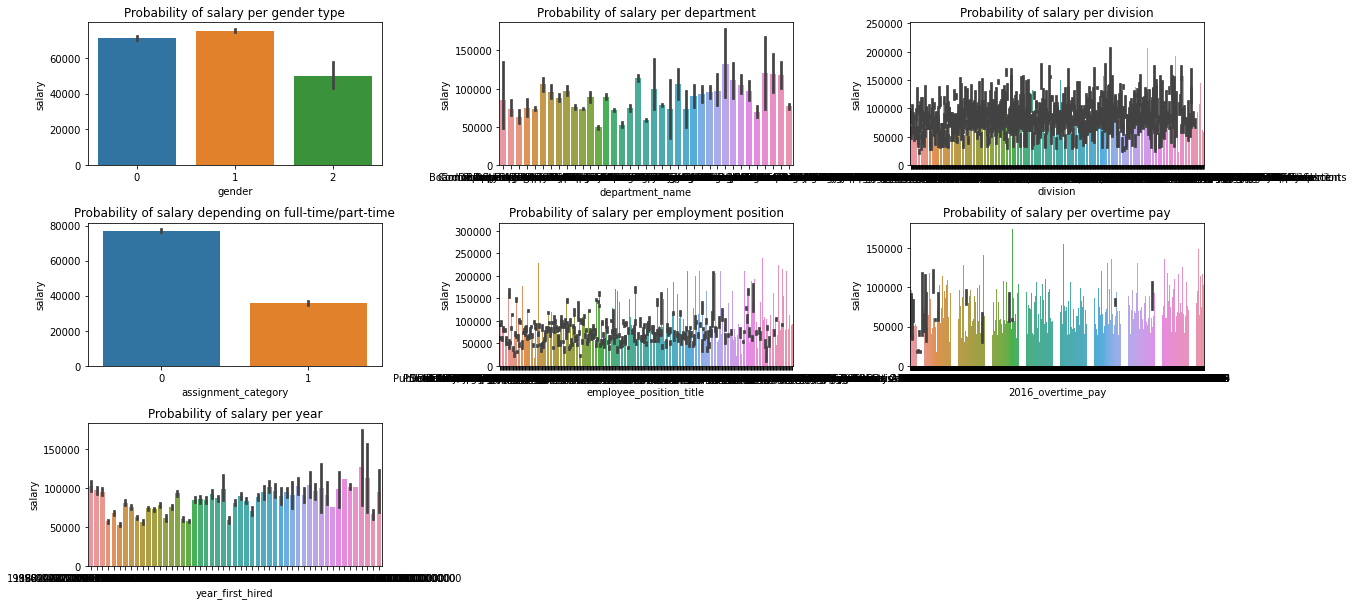

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3, 3, 1)
sns.barplot(x = "gender", y='salary', data = es_new)
plt.title('Probability of salary per gender type')

plt.subplot(3, 3, 2)
sns.barplot(x = "department_name", y='salary', data = es_new)
plt.title('Probability of salary per department')

plt.subplot(3, 3, 3)
sns.barplot(x = "division", y='salary', data = es_new)
plt.title('Probability of salary per division')

plt.subplot(3, 3, 4)
sns.barplot(x = "assignment_category", y='salary', data = es_new)
plt.title('Probability of salary depending on full-time/part-time')

plt.subplot(3, 3, 5)
sns.barplot(x = "employee_position_title", y='salary', data = es_new)
plt.title('Probability of salary per employment position')

plt.subplot(3, 3, 6)
sns.barplot(x = "2016_overtime_pay", y='salary', data = es_new)
plt.title('Probability of salary per overtime pay')

plt.subplot(3, 3, 7)
sns.barplot(x = "year_first_hired", y='salary', data = es_new)
plt.title('Probability of salary per year')

From the above charts we can see that there is some bias in gender.  However, the bias is more aparent in department_name, divisions and year_first_hired.

There may also be some correlation between overtime_pay and salary.

# Try AIF360

In [15]:
# Install the AIF 360 library
!pip install aif360 -q
!pip install fairlearn -q
!pip install lime -q

     |████████████████████████████████| 175 kB 5.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 177 kB 5.0 MB/s 
     |████████████████████████████████| 275 kB 5.0 MB/s 


In [16]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.model_selection import train_test_split

In [21]:
features = pd.concat([es_new.gender, 
                      es_new.assignment_category,
                      es_new.salary,
                      es_new.higher_salary,
                      es_new['2016_overtime_pay'],
                      es_new['2016_gross_pay_received'], 
                      es_new.underfilled_job,
                      pd.get_dummies(es_new.department_name)], 
                      axis=1)

#features[['underfilled_job_title']] = features[['underfilled_job_title']].where(features[['underfilled_job_title']].isnull(), 1).fillna(0).astype(int)

features = features.dropna()
features

,gender,assignment_category,salary,higher_salary,2016_overtime_pay,2016_gross_pay_received,underfilled_job,Board of Appeals Department,Board of Elections,Community Engagement Cluster,Community Use of Public Facilities,Correction and Rehabilitation,County Attorney's Office,County Council,Department of Environmental Protection,Department of Finance,Department of General Services,Department of Health and Human Services,Department of Housing and Community Affairs,Department of Liquor Control,Department of Permitting Services,Department of Police,Department of Public Libraries,Department of Recreation,Department of Technology Services,Department of Transportation,Ethics Commission,Fire and Rescue Services,Merit System Protection Board Department,Non-Departmental Account,Office of Agriculture,Office of Consumer Protection,Office of Emergency Management and Homeland Security,Office of Human Resources,Office of Human Rights,Office of Intergovernmental Relations Department,Office of Legislative Oversight,Office of Management and Budget,Office of Procurement,Office of Public Information,Office of Zoning and Administrative Hearings,Office of the Inspector General,Offices of the County Executive,Sheriff's Office
0,0,0,69222.18,0,416.10,71225.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,97392.47,1,3326.19,103088.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,104717.28,1,1353.32,107000.24,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,52734.57,0,3423.07,57819.04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,93396.00,1,0.00,95815.17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,0,0,72094.53,0,0.00,58154.47,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9224,0,0,169543.85,1,956.97,173173.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9225,1,1,102736.52,1,0.00,104238.18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,1,0,153747.50,1,0.00,149105.25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
x = features.drop(columns=['salary']).values
y = features['salary'].values

#train_BLD = BinaryLabelDataset(favorable_label='0',
#                                unfavorable_label='1',
#                                df=features,
#                                label_names=['salary'],
#                                protected_attribute_names=['gender']
#                                )

#df_aif = BinaryLabelDataset(df=features, label_names=['higher_salary'], protected_attribute_names=['gender', 'underfilled_job'])

#privileged_groups = [{'gender': 0, 'underfilled_job' : 0}]
#unprivileged_groups = [{'gender': 1, 'underfilled_job' : 1}]

df_aif = BinaryLabelDataset(df=features, label_names=['higher_salary'], protected_attribute_names=['gender'])

privileged_groups = [{'gender': 0}]
unprivileged_groups = [{'gender': 1}]

features_orig_trn, features_orig_val, features_orig_tst = df_aif.split([0.5, 0.8], shuffle=True)
print([x.features.shape for x in [features_orig_trn, features_orig_val, features_orig_tst]])


[(4564, 43), (2738, 43), (1826, 43)]


In [30]:
from IPython.display import Markdown, display

metric_orig_trn = BinaryLabelDatasetMetric(features_orig_trn, unprivileged_groups, privileged_groups)

display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_trn.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.024380


# Mitigate bias by Reweighing

In [31]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(features_orig_trn)

# Compute fairness metric on transformed dataset

In [32]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000


**We selected gender as the first attribute to identify bias, mitigate and re-evaluate the metrics.  
The bias before reweighing was 0.024380 and after -0.000000**